#### importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime

#### Importing and understanding the dataset

In [2]:
#reading the dataset : "Dataframe.csv"
df = pd.read_csv('./Datasets/MSFT.csv') 

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400
5,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.060648,58435200
6,1986-03-21,0.095486,0.097222,0.091146,0.092882,0.058994,59990400
7,1986-03-24,0.092882,0.092882,0.089410,0.090278,0.057340,65289600
8,1986-03-25,0.090278,0.092014,0.089410,0.092014,0.058443,32083200
9,1986-03-26,0.092014,0.095486,0.091146,0.094618,0.060097,22752000


In [4]:
#let's get some infromation about the data features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8857 non-null   object 
 1   Open       8857 non-null   float64
 2   High       8857 non-null   float64
 3   Low        8857 non-null   float64
 4   Close      8857 non-null   float64
 5   Adj Close  8857 non-null   float64
 6   Volume     8857 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 484.5+ KB


#### Data Description : 
Dataset features

- Date : Specific trading Date
- Open : Opening price of the trade for a day
- High : maximum price at particular day
- Low : minimum price at particular day
- Close : Closing price of the trade for a day
- Adj Close :  Adjusted Close 
- Volume : Stock of shares, Total Transactions/total trades, In simple way, Exchange of the shares

##### Type of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8857 non-null   object 
 1   Open       8857 non-null   float64
 2   High       8857 non-null   float64
 3   Low        8857 non-null   float64
 4   Close      8857 non-null   float64
 5   Adj Close  8857 non-null   float64
 6   Volume     8857 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 484.5+ KB


##### finiding about the missing and duplicate values

##### Finding about the missing values

In [6]:
df.isnull().values.any()

False

##### Inshight : False means there are no null values in the dataset 

##### Finding about the duplicates 

In [7]:
df[df.duplicated()]      

,Date,Open,High,Low,Close,Adj Close,Volume


##### Inshight : So by looking at the output we can say there are no duplicates in our dataset.

##### Working with date and time column, it is very important in the data about the datetime that we add month, year, day, hour and other additional information to get better inshights

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df["day_of_week"] = df.Date.dt.dayofweek
df["week"] = df.Date.dt.isocalendar().week
df['day'] = df['Date'].dt.day

AttributeError: 'DatetimeProperties' object has no attribute 'isocalendar'

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day_of_week
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,1986,3,3
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,1986,3,4
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,1986,3,0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,1986,3,1
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,1986,3,2


In [11]:
# Important Note : The ISO definition for week 1 is the week with the first Thursday in it. Using the ISO week number may give unexpected results near the start and end of a year. 
# For instance, in above output 01/01/2021 falls in week 53 of year 2020.

In [12]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day_of_week
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,1986,3,3
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,1986,3,4
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,1986,3,0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,1986,3,1
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,1986,3,2


##### Calculating the change in percentage that occured since the opening 

In [13]:
df['change'] = df['Close'] - df['Open']
df['change_in_percentage'] =   round( (( (df['Close'] - df['Open'] ) / df['Open'] ) * 100 ), 3)

In [14]:
df.head()
#df.head(1000)

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day_of_week,change,change_in_percentage
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,1986,3,3,0.008680,9.803
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,1986,3,4,0.003472,3.571
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,1986,3,0,0.001737,1.725
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,1986,3,1,-0.002605,-2.543
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,1986,3,2,-0.001736,-1.739


#### We can add following Technical Indicators features 

- Returns :  A positive return means the stock has grown in value, while a negative return means it has lost value. A stock with lower positive and negative daily returns is typically less risky than a stock with higher daily returns, which create larger swings in value.

- Moving Average : Moving Average are used by inverstors and traders to track and identify trends by smoothing Normal Day-to-Day Price Fluctuations 
    - In Addition, It's also used as support for future 
    - Calculated by period of time
    - two types, Simple and Exponential Moving Average
    
- MACD : Moving average convergence divergence (MACD) is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.
    - MACD triggers technical signals when it crosses above (to buy) or below (to sell) its signal line.
    - The speed of crossovers is also taken as a signal of a market is overbought or oversold.
    - MACD helps investors understand whether the bullish or bearish movement in the price is strengthening or weakening.
    
    


In [15]:
short_period = 12
long_period = 26
signal_period = 9

In [16]:
df['ema_12'] = df['Adj Close'].ewm(span=short_period, adjust=False).mean()
df['ema_26'] = df['Adj Close'].ewm(span=long_period, adjust=False).mean()
df['ema_50'] = df['Adj Close'].ewm(span=50, adjust=False).mean()
df['ema_100'] = df['Adj Close'].ewm(span=100, adjust=False).mean()
df['ema_200'] = df['Adj Close'].ewm(span=200, adjust=False).mean()

In [17]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day_of_week,change,change_in_percentage,ema_12,ema_26,ema_50,ema_100,ema_200
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,1986,3,3,0.008680,9.803,0.061751,0.061751,0.061751,0.061751,0.061751
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,1986,3,4,0.003472,3.571,0.062090,0.061914,0.061837,0.061794,0.061773
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,1986,3,0,0.001737,1.725,0.062547,0.062147,0.061963,0.061859,0.061805
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,1986,3,1,-0.002605,-2.543,0.062679,0.062240,0.062020,0.061890,0.061821
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,1986,3,2,-0.001736,-1.739,0.062621,0.062245,0.062031,0.061898,0.061826


In [18]:
ewm_short = df['ema_12']
ewm_long = df['ema_26']
df['MACD'] =  ewm_long - ewm_short
df['Signal'] =  df['Adj Close'].ewm(span=signal_period, adjust=False).mean()

In [19]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day_of_week,change,change_in_percentage,ema_12,ema_26,ema_50,ema_100,ema_200,MACD,Signal
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,1986,3,3,0.008680,9.803,0.061751,0.061751,0.061751,0.061751,0.061751,0.000000,0.061751
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,1986,3,4,0.003472,3.571,0.062090,0.061914,0.061837,0.061794,0.061773,-0.000176,0.062192
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,1986,3,0,0.001737,1.725,0.062547,0.062147,0.061963,0.061859,0.061805,-0.000400,0.062765
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,1986,3,1,-0.002605,-2.543,0.062679,0.062240,0.062020,0.061890,0.061821,-0.000439,0.062893
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,1986,3,2,-0.001736,-1.739,0.062621,0.062245,0.062031,0.061898,0.061826,-0.000376,0.062775


In [20]:
df['temp'] = df['Close'].shift(1)
# df.head()

In [21]:
df['Returns'] = (df['Adj Close']/df['temp']) -1
df.drop(['temp'],axis=1,inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day_of_week,change,change_in_percentage,ema_12,ema_26,ema_50,ema_100,ema_200,MACD,Signal,Returns
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,1986,3,3,0.008680,9.803,0.061751,0.061751,0.061751,0.061751,0.061751,0.000000,0.061751,NaN
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,1986,3,4,0.003472,3.571,0.062090,0.061914,0.061837,0.061794,0.061773,-0.000176,0.062192,-0.342167
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,1986,3,0,0.001737,1.725,0.062547,0.062147,0.061963,0.061859,0.061805,-0.000400,0.062765,-0.353893
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,1986,3,1,-0.002605,-2.543,0.062679,0.062240,0.062020,0.061890,0.061821,-0.000439,0.062893,-0.381002
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,1986,3,2,-0.001736,-1.739,0.062621,0.062245,0.062031,0.061898,0.061826,-0.000376,0.062775,-0.375895


In [22]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day_of_week,change,change_in_percentage,ema_12,ema_26,ema_50,ema_100,ema_200,MACD,Signal,Returns
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,1986,3,3,0.008680,9.803,0.061751,0.061751,0.061751,0.061751,0.061751,0.000000,0.061751,NaN
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,1986,3,4,0.003472,3.571,0.062090,0.061914,0.061837,0.061794,0.061773,-0.000176,0.062192,-0.342167
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,1986,3,0,0.001737,1.725,0.062547,0.062147,0.061963,0.061859,0.061805,-0.000400,0.062765,-0.353893
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,1986,3,1,-0.002605,-2.543,0.062679,0.062240,0.062020,0.061890,0.061821,-0.000439,0.062893,-0.381002
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,1986,3,2,-0.001736,-1.739,0.062621,0.062245,0.062031,0.061898,0.061826,-0.000376,0.062775,-0.375895


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C4DEBD608>,
      dtype=object)

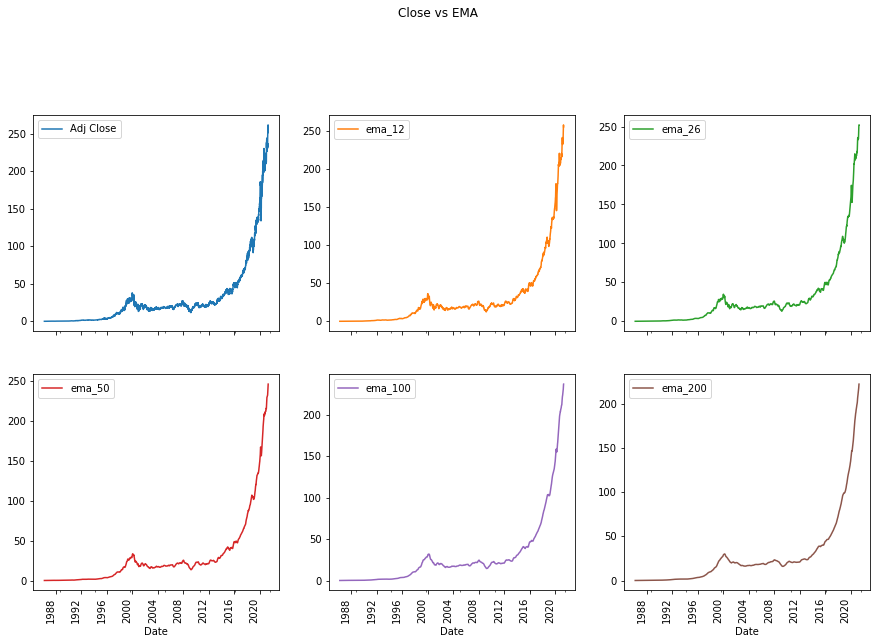

In [23]:
# Plot to view the same
df.plot(x = "Date", y = ['Adj Close', 'ema_12', 'ema_26', 'ema_50', 'ema_100', 'ema_200'] , subplots = True, layout = (3, 3), figsize = (15, 15), title = "Close vs EMA", rot = 90)

No handles with labels found to put in legend.


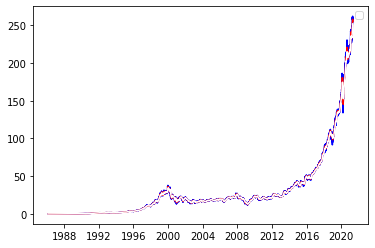

In [24]:
# multiple line plot for adj_close, ema_12 and ema_26
plt.plot( df['Date'] ,  df['Adj Close'] , 'b')
plt.plot( df['Date'], df['ema_12'] , 'r')
plt.plot( df['Date'], df['ema_26'] , 'w')
# show legend
plt.legend()

# show graph
plt.show()

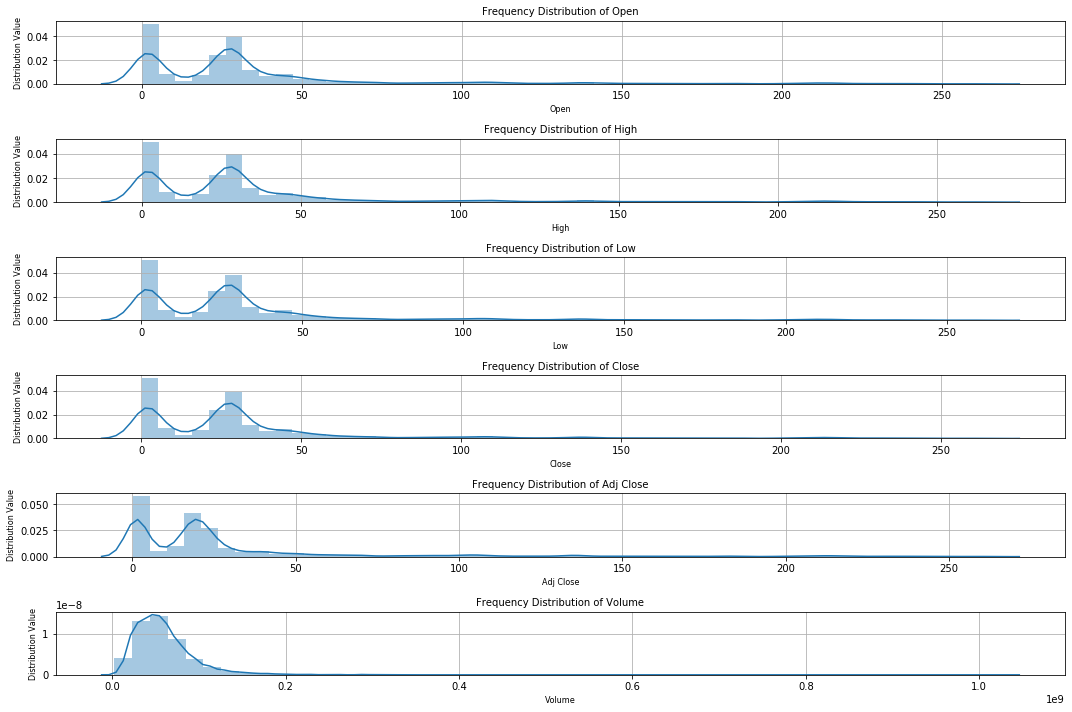

In [25]:

# Visualize the spread and skweness through the distribution plot
Column_List = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
# Use the Column_List : list initialized above in the following steps
fig, ax = plt.subplots(len(Column_List), figsize = (15, 10))

for i, col_list in enumerate(Column_List):
    sns.distplot(df[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Frequency Distribution of" + " " + col_list, fontsize = 10)
    ax[i].set_xlabel (col_list, fontsize = 8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) # To provide space between plots
    ax[i].grid('on') # Enabled to view and make markings

C:\Users\MAHIMA\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  
C:\Users\MAHIMA\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  
C:\Users\MAHIMA\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  
C:\Users\MAHIMA\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  
C:\Users\MAHIMA\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  
C:\Users\M

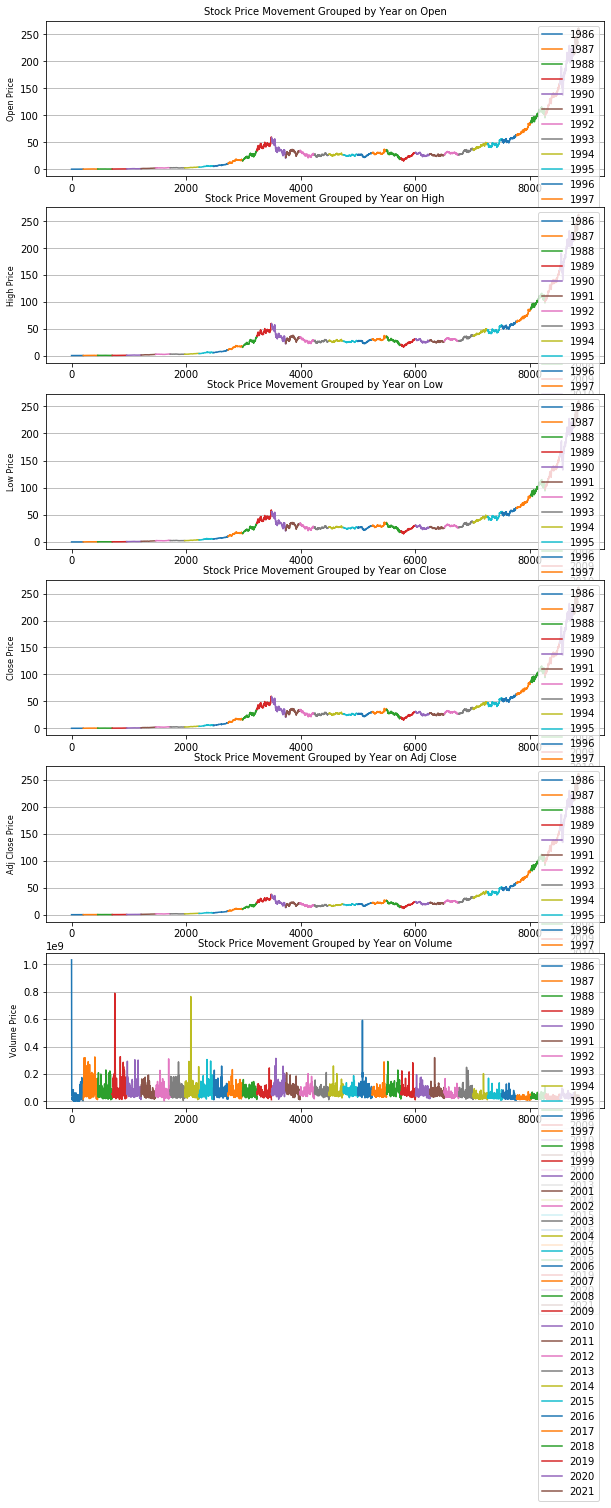

In [26]:
# Since the data is a time series data, we should be able to predict the future through forecasting techniques

# Delete the index column due to reset
#del Data['index']

# Firstly, plot the data year-wise to see the duration of when it hiked and dipped
fig, ax = plt.subplots(len(Column_List), figsize = (10, 20))

# Group the data by year and plot
for i, col_list in enumerate(Column_List):
    df.groupby('year')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Movement Grouped by Year on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True) # To enable grid only on the Y-axis

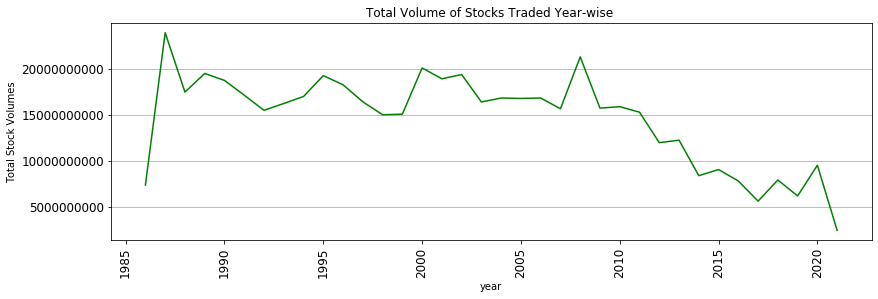

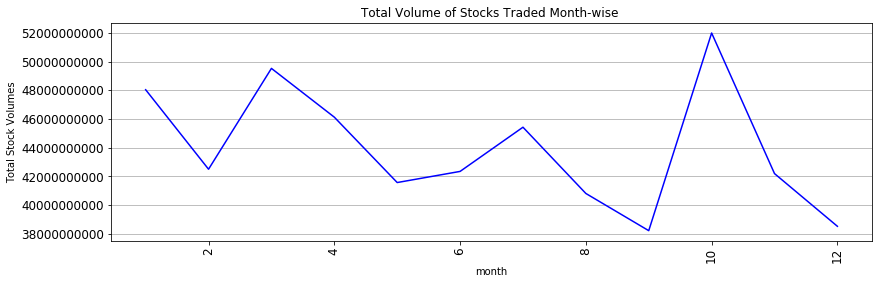

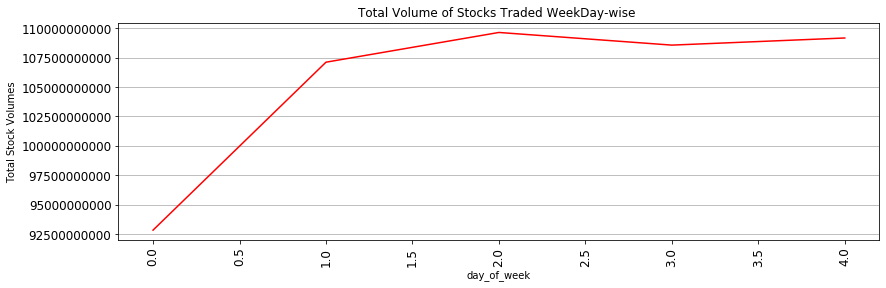

In [27]:
# Visualzing only the total volume of stocks traded grouped year-wise
check = df.groupby('year')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded Year-wise ", rot = 90, color = "green")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

# Visualzing only the total volume of stocks traded grouped month-wise
check = df.groupby('month')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded Month-wise ", rot = 90, color = "blue")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

# Visualzing only the total volume of stocks traded grouped weekday-wise
check = df.groupby('day_of_week')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded WeekDay-wise ", rot = 90, color = "red")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  8857 non-null   datetime64[ns]
 1   Open                  8857 non-null   float64       
 2   High                  8857 non-null   float64       
 3   Low                   8857 non-null   float64       
 4   Close                 8857 non-null   float64       
 5   Adj Close             8857 non-null   float64       
 6   Volume                8857 non-null   int64         
 7   year                  8857 non-null   int64         
 8   month                 8857 non-null   int64         
 9   day_of_week           8857 non-null   int64         
 10  change                8857 non-null   float64       
 11  change_in_percentage  8857 non-null   float64       
 12  ema_12                8857 non-null   float64       
 13  ema_26            

In [29]:
import pickle

In [30]:
pickle_out = open("msftdf.pickle","wb")
pickle.dump(df, pickle_out)
pickle_out.close()